<a href="https://colab.research.google.com/github/Akhilps04/Project-7/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
(10000, 28, 28)
Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3481 - val_loss: 0.1623
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1527 - val_loss: 0.1270
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1232 - val_loss: 0.1087
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1069 - val_loss: 0.0981
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0969 - val_loss: 0.0907
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0900 - val_loss: 0.0856
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0852 - val_loss: 0.0816
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0816 - val_loss: 0.0792
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0795 - val_loss: 0.0775
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0778 - val_loss: 0.0763
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0769 - val_loss: 0.0754
Epoch 12/

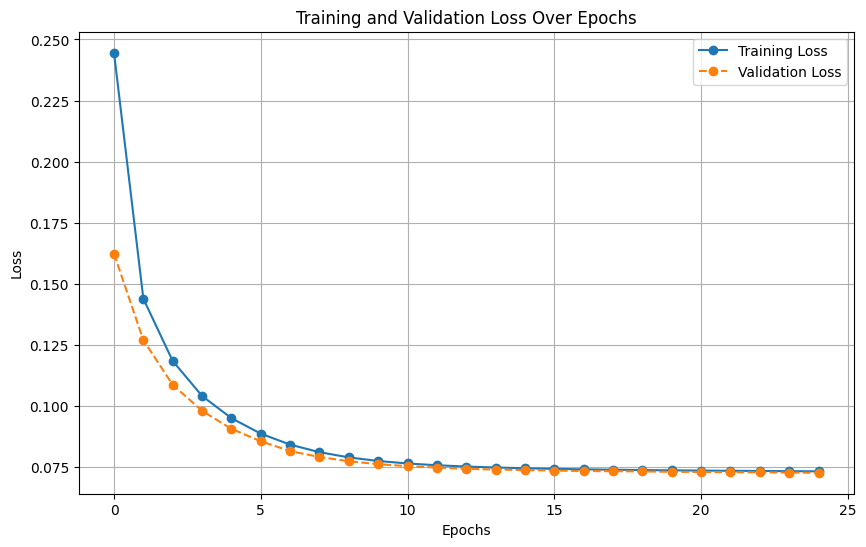

Average Pixel Accuracy: 99.80%


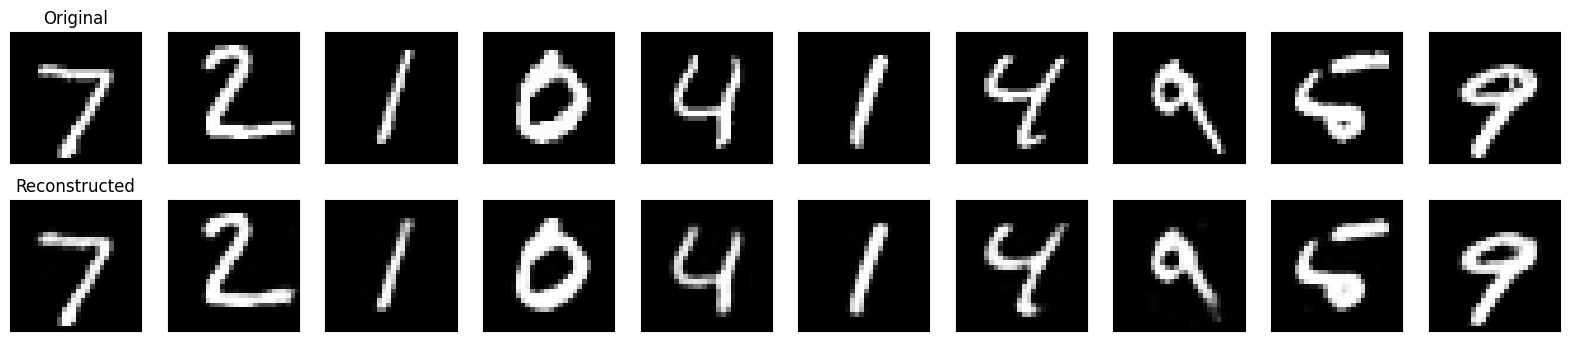

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# Normalize and flatten data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Build autoencoder model
input_img = Input(shape=(28 * 28,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(28 * 28, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
history = autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat)
)

# Reconstruct test images
reconstructed_images = autoencoder.predict(x_test_flat)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', linestyle='--')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Calculate custom pixel accuracy
threshold = 0.5
reconstructed_images_reshaped = reconstructed_images.reshape(-1, 28 * 28)
accuracy_per_image = np.mean(np.abs(x_test_flat - reconstructed_images_reshaped) < threshold, axis=1)
average_accuracy = np.mean(accuracy_per_image)
print(f"Average Pixel Accuracy: {average_accuracy * 100:.2f}%")

# Visualize original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original', fontsize=12)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Reconstructed', fontsize=12)
plt.show()
